In [1]:
import os
import numpy as np
import cv2
import pickle
import matplotlib
import platform
from tqdm import tqdm
import tensorflow as tf
from base64 import b64encode
import imageio
import imgaug.augmenters as iaa
import imgaug as ia
from sklearn.model_selection import StratifiedShuffleSplit
from keras.layers import Input
from keras.models import Model
from keras.layers.core import Dropout,Flatten,Dense
import matplotlib.pyplot as plt
from keras import regularizers
from keras.applications import MobileNetV2
from keras.applications import ResNet50, ResNet101, ResNet152
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau
# from keras_self_attention import SeqSelfAttention, SeqWeightedAttention
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.layers import Layer
import datetime
import seaborn as sns
from sklearn import metrics
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix
import argparse
import time
from keras.models import load_model
from tensorflow.python.client import device_lib
from collections import deque
from sklearn.model_selection import train_test_split
from random import shuffle
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
import scipy.io
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import shape,math
from tensorflow.keras import Input,layers,Model
from tensorflow.keras.losses import mse,binary_crossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dense, Flatten, Dropout, BatchNormalization, Reshape, LeakyReLU, Input, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
from keras.models import Model
from keras import Sequential

print(tf.__version__)

2.10.1


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os 

src = 'D:/abnormal_detection_dataset/data_3000/'

# 이미지 읽기
def img_read(src,file):
    img = cv.imread(src+file,cv.COLOR_BGR2GRAY)
    return img

# src 경로에 있는 파일 명을 저장합니다. 
files = os.listdir(src)

X = []
Y = []

# 경로와 파일명을 입력으로 넣어 확인하고 
# 데이터를 255로 나눠서 0~1사이로 정규화 하여 X 리스트에 넣습니다. 
for file in files: 
    X.append(img_read(src,file)/255.)
    Y.append(1) # nomal label : 1

# array로 데이터 변환
X = np.array(X)
Y = np.array(Y)

print('Normal shape:',np.shape(X))

Normal shape: (3000, 56, 56)


In [3]:
import sklearn
from sklearn.model_selection import train_test_split

# Train set, Test set으로 나누기 
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.2, random_state=1,shuffle=True)

# 형태를 3차원에서 2차원으로 변경, 첫 번째 인덱스 : 이미지 수, 두 번쨰 인덱스 : 2차원 이미지를 1차원으로 변경 후의 길이
# X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
# X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

print(np.shape(X_train)) #(2400, 3136)
print(np.shape(X_test)) #(600, 3136)

(2400, 56, 56)
(600, 56, 56)


In [4]:
src = 'D:/abnormal_detection_dataset/data_1000/'

# 이미지 읽기
def img_read(src,file):
    img = cv.imread(src+file,cv.COLOR_BGR2GRAY)
    return img

# src 경로에 있는 파일 명을 저장합니다. 
files = os.listdir(src)

ANom = []
ANom_Y = []

# 경로와 파일명을 입력으로 넣어 확인하고 
# 데이터를 255로 나눠서 0~1사이로 정규화 하여 X 리스트에 넣습니다. 
for file in files: 
    ANom.append(img_read(src,file)/255.)
    ANom_Y.append(0) # Anomal label : 0

# array로 데이터 변환
ANom = np.array(ANom)
ANom_Y = np.array(ANom_Y)
print('Anomaly shape:', np.shape(ANom_Y))

# 형태를 3차원에서 2차원으로 변경, 첫 번째 인덱스 : 이미지 수, 두 번쨰 인덱스 : 2차원 이미지를 1차원으로 변경 후의 길이
ANom_images = ANom.reshape((len(ANom), np.prod(ANom.shape[1:])))
print(np.shape(ANom_images))

Anomaly shape: (1000,)
(1000, 3136)


In [5]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split

In [6]:
print(tf.__version__)     # 텐서플로우 버전확인 (colab의 기본버전은 1.15.0) --> 2.0 변경 "%tensorflow_version 2.x"
print(keras.__version__)

2.10.1
2.10.0


In [7]:
encoder_input = Input(shape=(56, 56, 1))

# 360 x 360
x = Conv2D(filters=32, kernel_size=3, padding='same')(encoder_input) 
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# 360 x 360 -> 180 x 180
x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x) #strides=2,
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# 180 x 180 -> 90 x 90
x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)#strides=2,
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, padding='same')(x)#strides=2,
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

# 2D 좌표로 표기하기 위하여 2를 출력값으로 지정합니다.
encoder_output = Dense(1, activation='sigmoid')(x)

encoder = Model(encoder_input, encoder_output)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 56, 56, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 56, 56, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                             

In [8]:
# Input으로는 2D 좌표가 들어갑니다.
decoder_input = Input(shape=(1, ))

# 2D 좌표를 7*7*64 개의 neuron 출력 값을 가지도록 변경합니다.
x = Dense(14*14*64, activation='sigmoid')(decoder_input)
x = Reshape( (14, 14, 64))(x)

# 7 X 7 -> 7 X 7
x = Conv2DTranspose(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# 7 X 7 -> 14 X 14
x = Conv2DTranspose(filters=64, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# 14 X 14 -> 28 X 28
x = Conv2DTranspose(filters=64, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# 28 X 28 -> 28 X 28
x = Conv2DTranspose(filters=32, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# 최종 output
decoder_output = Conv2DTranspose(1, 3, strides=1, padding='same', activation='tanh')(x)

decoder = Model(decoder_input, decoder_output)
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_1 (Dense)             (None, 12544)             25088     
                                                                 
 reshape (Reshape)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       36928     
 nspose)                                                         
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 14, 14, 64)        0   

In [9]:
decoder = Model(decoder_input, decoder_output)

In [10]:
encoder_in = Input(shape=(56, 56, 1))
x = encoder(encoder_in)
decoder_out = decoder(x)

In [11]:
auto_encoder = Model(encoder_in, decoder_out)
auto_encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 56, 56, 1)]       0         
                                                                 
 model (Functional)          (None, 1)                 106113    
                                                                 
 model_2 (Functional)        (None, 56, 56, 1)         155521    
                                                                 
Total params: 261,634
Trainable params: 260,738
Non-trainable params: 896
_________________________________________________________________


In [12]:
# 모델 구조 확정하고 컴파일 진행
auto_encoder.compile(loss='MSE',                   # MSE : mean square error
              optimizer='adam',                 
              metrics=[ 'mae' ])            # MAE : mean absolute  error  

# model.fit을 써서 학습. 학습과정을 history에 저장
history = auto_encoder.fit(X_train, X_train,
                    batch_size=256,
                    epochs=20,
                    validation_data=(X_test, X_test),
                    shuffle=True)

Epoch 1/20
10/10 [==============================] - 5s 130ms/step - loss: 0.2941 - mae: 0.4393 - val_loss: 0.3056 - val_mae: 0.4454
Epoch 2/20
10/10 [==============================] - 1s 60ms/step - loss: 0.1785 - mae: 0.3558 - val_loss: 0.2327 - val_mae: 0.4183
Epoch 3/20
10/10 [==============================] - 1s 60ms/step - loss: 0.1381 - mae: 0.2884 - val_loss: 0.1998 - val_mae: 0.4072
Epoch 4/20
10/10 [==============================] - 1s 60ms/step - loss: 0.1268 - mae: 0.2752 - val_loss: 0.1982 - val_mae: 0.4033
Epoch 5/20
10/10 [==============================] - 1s 60ms/step - loss: 0.1200 - mae: 0.2647 - val_loss: 0.1957 - val_mae: 0.4007
Epoch 6/20
10/10 [==============================] - 1s 60ms/step - loss: 0.1143 - mae: 0.2594 - val_loss: 0.1943 - val_mae: 0.3974
Epoch 7/20
10/10 [==============================] - 1s 60ms/step - loss: 0.1106 - mae: 0.2546 - val_loss: 0.1923 - val_mae: 0.3953
Epoch 8/20
10/10 [==============================] - 1s 60ms/step - loss: 0.1087 - 

In [13]:
checkpoint_path = 'tmp/anomaly_auto-encoder-MNIST.h5'
checkpoint = ModelCheckpoint(checkpoint_path, 
                             save_best_only=True, 
                             save_weights_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [14]:
history = auto_encoder.fit(X_train, X_train, 
                 batch_size=256, 
                 epochs=100, 
                 callbacks=[checkpoint], 
                )

Epoch 1/100
10/10 [==============================] - 1s 52ms/step - loss: 0.1039 - mae: 0.2460
Epoch 2/100
10/10 [==============================] - 1s 52ms/step - loss: 0.1040 - mae: 0.2473
Epoch 3/100
10/10 [==============================] - 1s 52ms/step - loss: 0.1038 - mae: 0.2462
Epoch 4/100
10/10 [==============================] - 1s 52ms/step - loss: 0.1040 - mae: 0.2472
Epoch 5/100
10/10 [==============================] - 1s 52ms/step - loss: 0.1040 - mae: 0.2473
Epoch 6/100
10/10 [==============================] - 1s 52ms/step - loss: 0.1040 - mae: 0.2466
Epoch 7/100
10/10 [==============================] - 1s 52ms/step - loss: 0.1041 - mae: 0.2468
Epoch 8/100
10/10 [==============================] - 1s 53ms/step - loss: 0.1039 - mae: 0.2467
Epoch 9/100
10/10 [==============================] - 1s 55ms/step - loss: 0.1039 - mae: 0.2468
Epoch 10/100
10/10 [==============================] - 1s 53ms/step - loss: 0.1040 - mae: 0.2470
Epoch 11/100
10/10 [=============================

### Normal data 복원 확인 (data_3000 중 20%의 test data)

Normal Test data cost =  0.1006
19/19 [==============================] - 0s 4ms/step


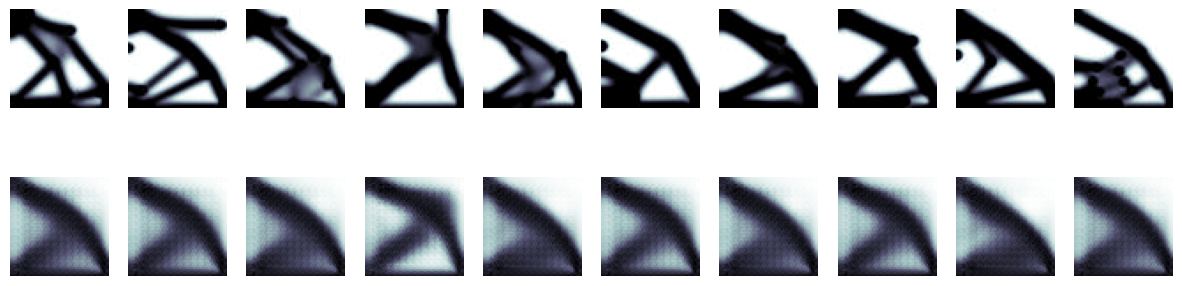

In [15]:
test_score = auto_encoder.evaluate(X_test, X_test, verbose=0) # loss 값 결과 확인
print('Normal Test data cost = ', '{:.4f}'.format(test_score[0]))

sample_size = 10                        # 보여줄 sample 갯수 설정
prediction1 = auto_encoder.predict(X_test)      # test 데이터로 이미지 복원(predict 함수 사용)

# plot 하기
fig, ax = plt.subplots(2, sample_size, figsize=(15, 4))
for i in range(sample_size):
  org_img1 = X_test[i].reshape(56,56)
  rec_img1 = prediction1[i].reshape(56,56)
  
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  
  ax[0][i].imshow(org_img1, cmap=plt.cm.bone)
  ax[1][i].imshow(rec_img1, cmap=plt.cm.bone)

plt.show()


### Abnormal data 복원 확인 (data_1000)

In [18]:
ANom_score = auto_encoder.evaluate(ANom_images, ANom_images, verbose=0) # loss 값 결과 확인
print('Abnormal Testing data cost = ', '{:.4f}'.format(ANom_score[0]))

sample_size = 10                        # 보여줄 sample 갯수 설정
prediction2 = auto_encoder.predict(ANom_images)      # test 데이터로 이미지 복원(predict 함수 사용)

# plot 하기
fig, ax = plt.subplots(2, sample_size, figsize=(15, 4))
for i in range(sample_size):
  org_img2 = ANom_images[i].reshape(56,56)
  rec_img2 = prediction2[i].reshape(56,56)
  
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  
  ax[0][i].imshow(org_img2, cmap=plt.cm.bone)
  ax[1][i].imshow(rec_img2, cmap=plt.cm.bone)

plt.show()

InvalidArgumentError: Graph execution error:

Detected at node 'model_3/model/conv2d/Conv2D' defined at (most recent call last):
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\user\AppData\Local\Temp\ipykernel_20880\2003497739.py", line 1, in <module>
      ANom_score = auto_encoder.evaluate(ANom_images, ANom_images, verbose=0) # loss 값 결과 확인
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\training.py", line 1947, in evaluate
      tmp_logs = self.test_function(iterator)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\training.py", line 1727, in test_function
      return step_function(self, iterator)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\training.py", line 1713, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\training.py", line 1701, in run_step
      outputs = model.test_step(data)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\training.py", line 1665, in test_step
      y_pred = self(x, training=False)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\layers\convolutional\base_conv.py", line 283, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\layers\convolutional\base_conv.py", line 255, in convolution_op
      return tf.nn.convolution(
Node: 'model_3/model/conv2d/Conv2D'
Detected at node 'model_3/model/conv2d/Conv2D' defined at (most recent call last):
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\user\AppData\Local\Temp\ipykernel_20880\2003497739.py", line 1, in <module>
      ANom_score = auto_encoder.evaluate(ANom_images, ANom_images, verbose=0) # loss 값 결과 확인
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\training.py", line 1947, in evaluate
      tmp_logs = self.test_function(iterator)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\training.py", line 1727, in test_function
      return step_function(self, iterator)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\training.py", line 1713, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\training.py", line 1701, in run_step
      outputs = model.test_step(data)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\training.py", line 1665, in test_step
      y_pred = self(x, training=False)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\layers\convolutional\base_conv.py", line 283, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "c:\Users\user\anaconda3\envs\real_life_violence_detection1\lib\site-packages\keras\layers\convolutional\base_conv.py", line 255, in convolution_op
      return tf.nn.convolution(
Node: 'model_3/model/conv2d/Conv2D'
2 root error(s) found.
  (0) INVALID_ARGUMENT:  input must be 4-dimensional[32,3136]
	 [[{{node model_3/model/conv2d/Conv2D}}]]
	 [[Func/cond/then/_11/input/_37/_66]]
  (1) INVALID_ARGUMENT:  input must be 4-dimensional[32,3136]
	 [[{{node model_3/model/conv2d/Conv2D}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_test_function_10486]

### Test_data & data_1000 예측값(y_pred) 구하기 (AE 통과하기)
#### data_3000과 data_1000의 이미지 별 loss(MSE) 구하기
#### 둘을 비교하여 (히스토그램) 임계값 설정

In [ ]:
import pandas as pd # pandas 라이브러리

# Normal data (data_3000)
Nom_data = np.concatenate((X_test, X_train), axis = 0)
Nom_pred = auto_encoder.predict(Nom_data) # AE 이미지 결과값 
Nom_pred_mse = np.mean(np.power(Nom_data - Nom_pred, 2), axis=1) # input - output 이미지간의 MSE 구하기

# 기초통계학 평균, 분산, 최소값, 최대값, 25%, 50%, 75% 분포 구하는 방법
print('Normal Metric')
Nom_pred_mse_df = pd.DataFrame({'Normal_mse':Nom_pred_mse})
print(Nom_pred_mse_df.describe())

print('\n')

# Abnormal data (data_1000)
ANom_pred = auto_encoder.predict(ANom_images) # AE 이미지 결과값 
ANom_pred_mse = np.mean(np.power(ANom_images - ANom_pred, 2), axis=1) # input - output 이미지간의 MSE 구하기

# 기초통계학 평균, 분산, 최소값, 최대값, 25%, 50%, 75% 분포 구하는 방법
print('Anomaly Metric')
ANom_pred_mse_df = pd.DataFrame({'Anomaly_mse':ANom_pred_mse})
print(ANom_pred_mse_df.describe())

# 히스토그램 그리기
print('\n')
plt.figure()
plt.title('MSE Histogram') # 그림 이름 설정 
plt.hist(Nom_pred_mse, bins=10, facecolor='blue', histtype='step') #히스토그램 함수, bins:데이터를 범주화 하는 기준
plt.hist(ANom_pred_mse, bins=10, facecolor='red', histtype='step') #히스토그램 함수, bins:데이터를 범주화 하는 기준
plt.show()

In [ ]:
# 비교 가능하도록 데이터 설정 (data_3000 중 20%의 x_test + data_1000)

In [ ]:
test_data = np.concatenate((X_test, ANom_images), axis = 0)
y_true = np.concatenate((Y_test, ANom_Y), axis = 0)

print(np.shape(test_data))
print(np.shape(y_true))

In [ ]:
### 임계값 설정
### 각 이미지별 Loss가 임계점보다 높으면 positive(이상), 낮으면 negative(정상)으로 구분

In [ ]:
# 각 이미지별 loss를 구하여 설정한 임계값으로 조건을 제시한다.
test_data_pred = auto_encoder.predict(test_data)
all_cost = np.mean(np.power(test_data - test_data_pred, 2), axis=1)

threshold = 0.045  # 설정한 임계값 (선택 가능)

y_pred = [] #y_pred list 초기화
for i in range(len(all_cost)):
    if all_cost[i] > threshold :
        y_pred.insert(i, 0) #임계점보다 높으면 positive(이상)
    else:
        y_pred.insert(i, 1) #임계점보다 낮으면 negative(정상)
        
print(y_pred[0:100]) #프린트로 값을 확인할 수 있다 (확인용으로 100개만).
print(np.shape(y_pred))

In [ ]:
#### Confusion_matrix 계산하기

In [ ]:
from sklearn.metrics import confusion_matrix #confusion_matrix 라이브러리 임포트

con_mat = confusion_matrix(y_true, y_pred) #confusion_matrix 함수 실행

# Print the confusion matrix as text.
TP = con_mat[0][0] #둘다 Anomal, 0이며 예측값이 positive(이상값)이다.
FN = con_mat[0][1] #실제값과 예측값이 달랐으며, 예측값이 negative(정상값)이다.
FP = con_mat[1][0] #실제값과 예측값이 달랐으며, 예측값이 postive(이상값)이다.
TN = con_mat[1][1] #둘다 nomal, 1이며 예측값이 negative(정상값)이다.
print('\n',
      'TP :', TP, '\n', 
      'FN :', FN, '\n', 
      'FP :', FP, '\n', 
      'TN :', TN, '\n')

Accuracy = (TP+TN)/(TP+FN+FP+TN) #정분류율 : 전체관측치 중 실제값과 예측치가 일치하는 정도
print('Accuracy(정분류율=(TP+TN)/(TP+FN+FP+TN)):', '{:.2%}'.format(Accuracy))

Error_rate = (FP+FN)/(TP+FN+FP+TN) #오분류율 : 전체 관측치 중 실제값과 예측치가 다른 정보 (1-accuracy)
print('Error_rate(오분류율=(FP+FN)/(TP+FN+FP+TN):', '{:.2%}'.format(Error_rate))

Precirion = TP/(TP+FP) #정확도 : TRUE로 예측한 관측치 중 실제값이 TRUE인 정도
print('Precirion(정확도=TP/(TP+FP)):', '{:.2%}'.format(Precirion))

Recall = TP/(TP+FN) #재현율 : 실제값이 TRUE인 관측치 중 예측치가 적중한 정도, 모형의 완정성을 평가함, 민감도
print('Recall(재현율,민감도=TP/(TP+FN)):', '{:.2%}'.format(Recall))

print('\n')
# Confusion Matrix 표 그리기
plt.imshow(con_mat, interpolation='nearest', cmap=plt.cm.Blues)

# Plot 구성하기
plt.title('Confusion Matrix', fontsize=20) # Plot 이름
plt.tight_layout()
plt.colorbar()
label=["Anomal(0)", "Nomal(1)"] # 라벨값
tick_marks = np.arange(len(label)) 
plt.xticks(tick_marks, label)
plt.yticks(tick_marks, label)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)

# 표 안에 숫자 기입하는 방법
name = [['TP','FN'], ['FP', 'TN']]
thresh = con_mat.max() / 2.
for i in range(2):
     for j in range(2):
        plt.text(j, i, str(name[i][j])+" = "+str(con_mat[i, j]),
                 horizontalalignment="center",
                 color="white" if con_mat[i, j] > thresh else "black",
                 fontsize=16)
    
plt.show()

In [ ]:
# model = Sequential()  ### CNN-LSTM
# input_shape = (56, 56, 1)  # (224, 224, 3)

# model.add(layers.Input(shape=(input_shape)))

# model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D(strides=(2, 2)))

# model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.2))
# model.add(layers.MaxPooling2D(strides=(2, 2)))

# model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.2))
# model.add(layers.MaxPooling2D(strides=(2, 2)))

# model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.2))
# model.add(layers.MaxPooling2D(strides=(2, 2)))

# model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.2))

# # model.add(layers.channel_attention_module)


# model.add(layers.TimeDistributed(Flatten()))

# model.add(layers.LSTM(1024))
# model.add(layers.LSTM(1024), return_sequences=True, return_state=True)

# # model.add(layers.Attention(use_scale=False, score_mode='dot'))

# model.add(layers.GlobalAveragePooling2D())

# # x = BAM(inputs=a, batch_norm_params=a)(a)


# model.add(layers.Dense(1024, activation='relu'))
# model.add(layers.Dropout(0.2))

# model.add(layers.Dense(512, activation='relu'))

# model.add(layers.Dense(1, activation='sigmoid'))
# model = Model(inputs=model.input, outputs=model.output)